## Get traces and clean up

In [1]:
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import *
import pickle
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

import scipy.signal as sig
from scipy.cluster.vq import whiten

In [2]:
dat_fname_2d = 'all_traces.pickle'
all_traces_2d = pickle.load(open(dat_fname_2d, 'rb'))

dat_fname_3d = 'all_traces_3d.pickle'
all_traces_3d = pickle.load(open(dat_fname_3d, 'rb'))

In [9]:
all_traces_3d

[{'mcherry': tensor([119.5878, 136.0031, 104.9584,  69.2508,  42.2184,  41.0677,  80.7963,
           57.3464,  77.0141,  69.1822,  43.7796,  56.3802,  64.2756,  92.1999,
          110.3253,  78.7453,  81.8705, 105.1411,  80.3405,  65.8308,  65.0658,
           71.7851,  38.0003,  23.2827,  25.3577,  41.5141,  67.1452,  60.4931,
           43.1073,  75.1579,  57.3726,  43.6834,  96.9662,  69.8590,  50.5868,
           90.3307, 105.1945,  92.8079,  88.9128,  75.4569,  78.7366, 100.9099,
           87.7514,  86.7122,  92.4787,  71.4789,  77.4291, 104.6334, 102.2055,
          140.2058, 152.0102, 104.0461,  63.9821,  94.0456, 121.2077,  93.1932,
          119.6049, 109.2131,  96.6677, 129.2238,  90.8538,  94.7823,  19.9102,
           39.0621,  32.5818,  46.5069,  26.2057,  51.8547,  31.7904,  20.8885,
           13.4764,  12.1058,  44.4403,  68.1347,  24.2621,  38.2625,  38.7089,
           29.9511,  39.9106,  29.7823,  44.2387,  74.1696,  74.8509,  91.1381,
           73.4326,  67.0536,

## Compare visually

In [23]:
which_neurons = list(range(len(all_traces_2d)))
def f(which_field):
    for i in which_neurons:
        dat2d = all_traces_2d[i][which_field]
        dat3d = all_traces_3d[i][which_field]

        plt.figure(figsize=(25,5))
        plt.plot(dat2d, label='2d')
        plt.plot(dat3d, label='3d')
        plt.legend()
        plt.title(f'Neuron {i}')

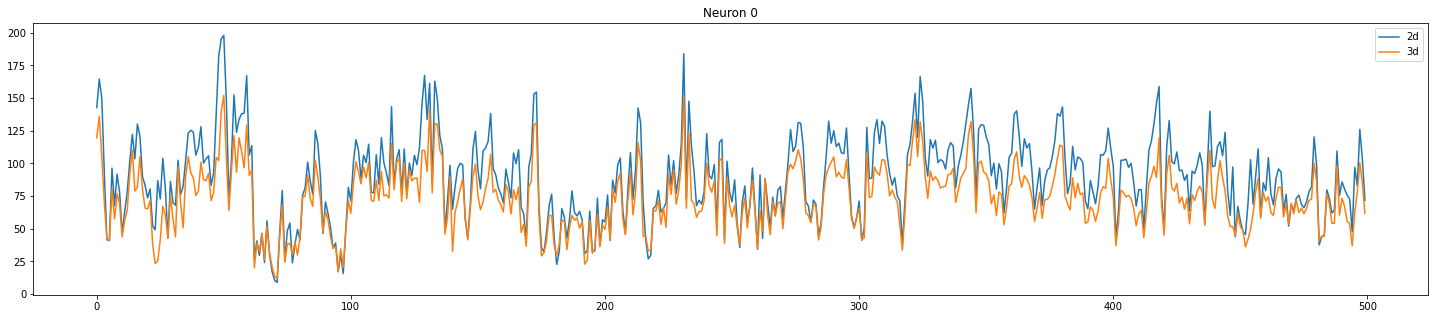

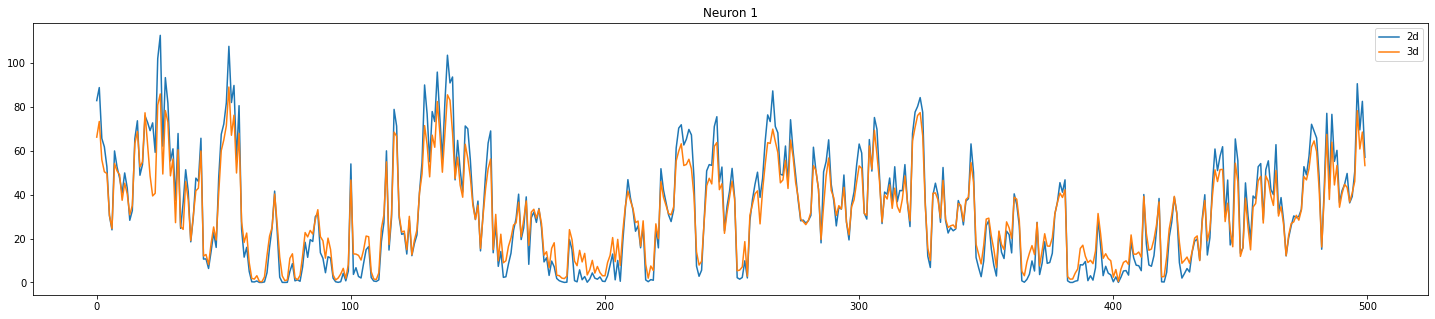

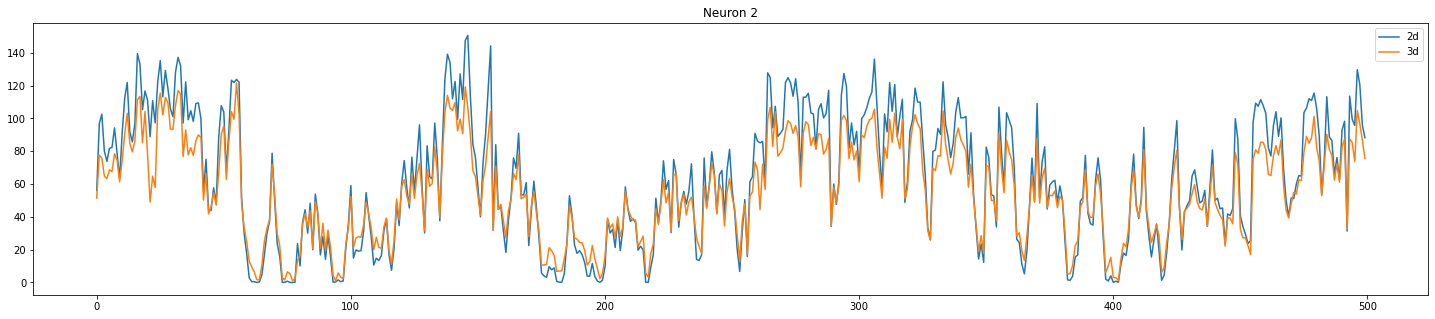

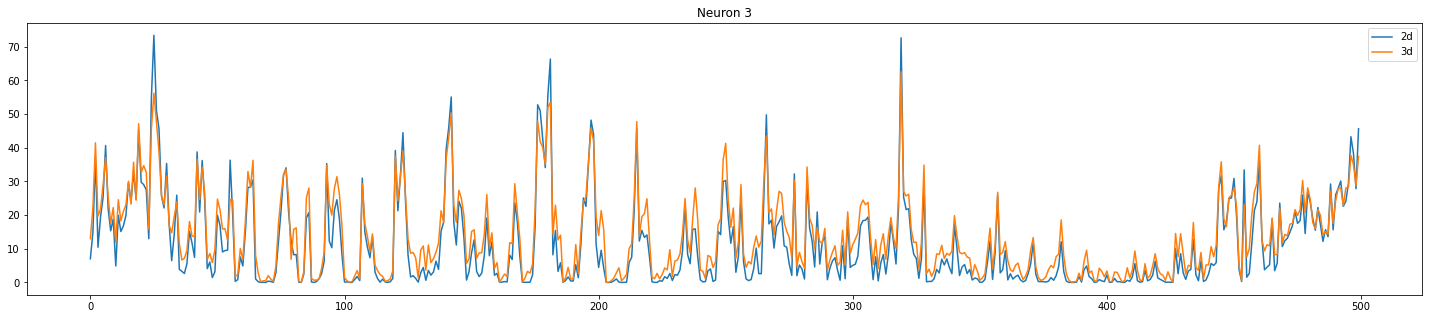

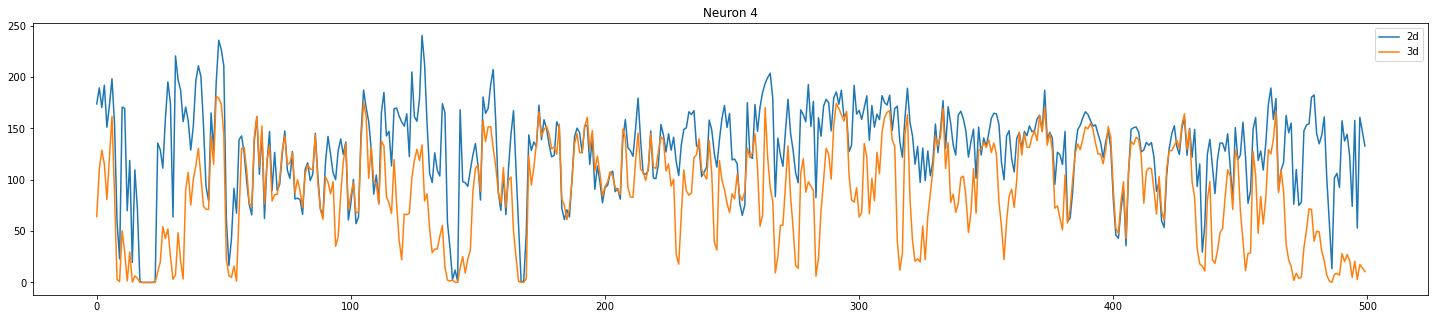

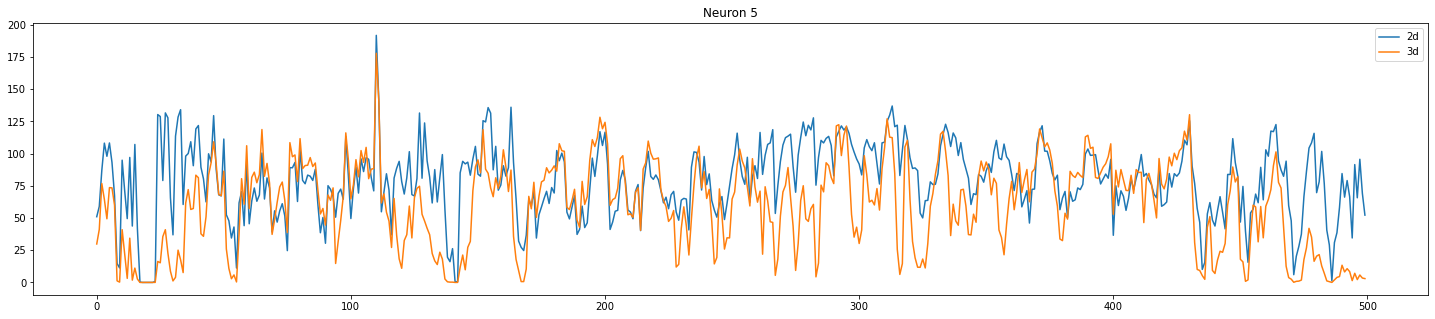

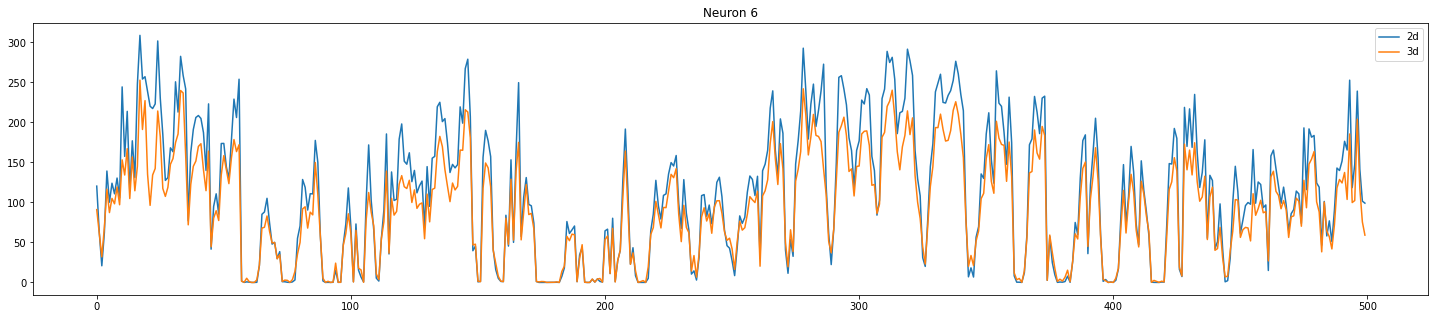

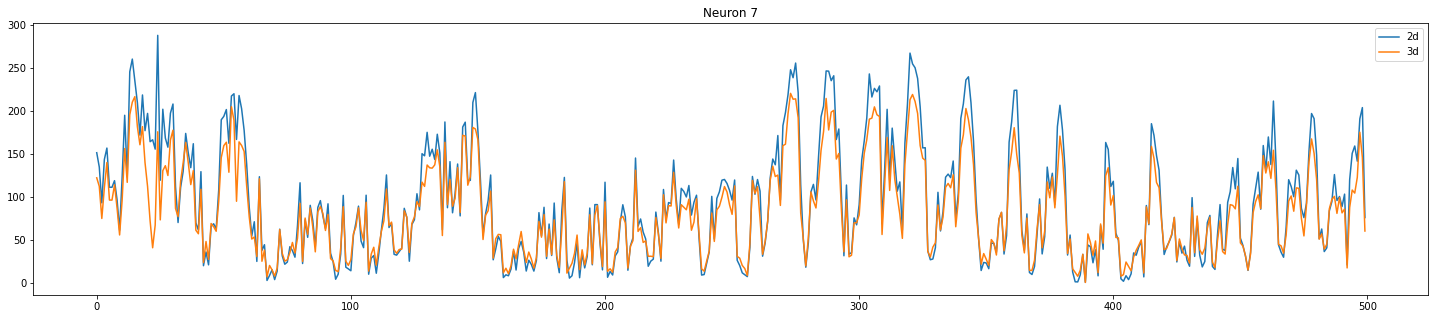

In [24]:

f('mcherry')

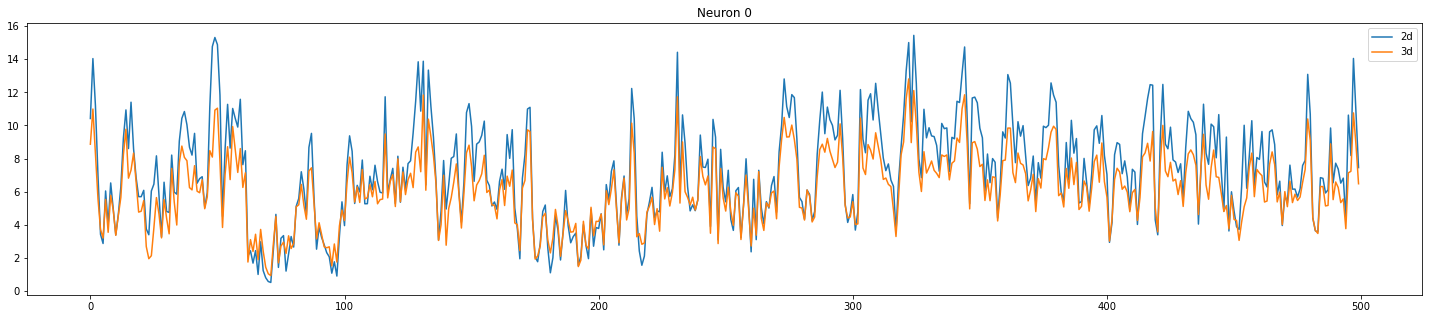

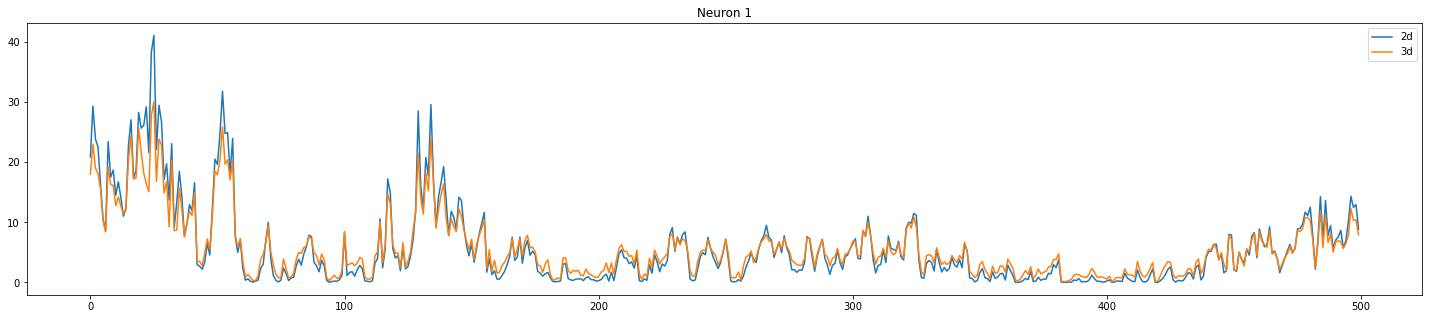

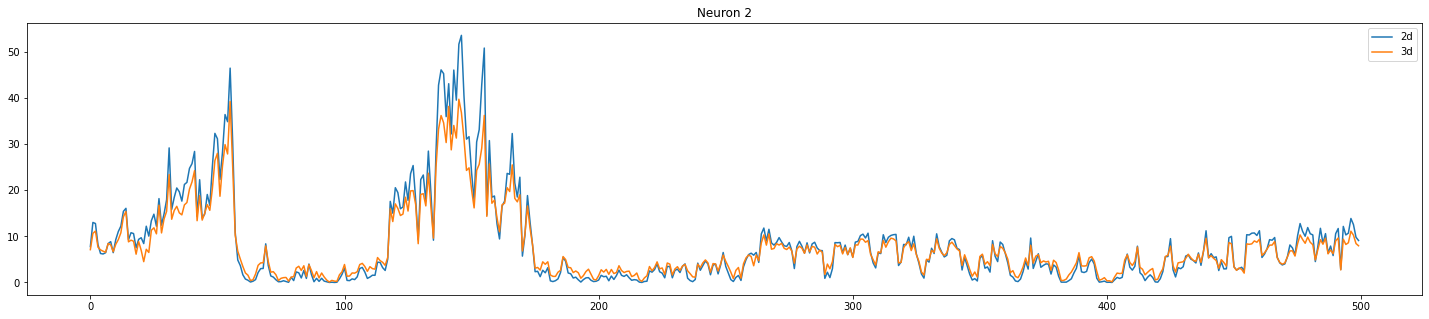

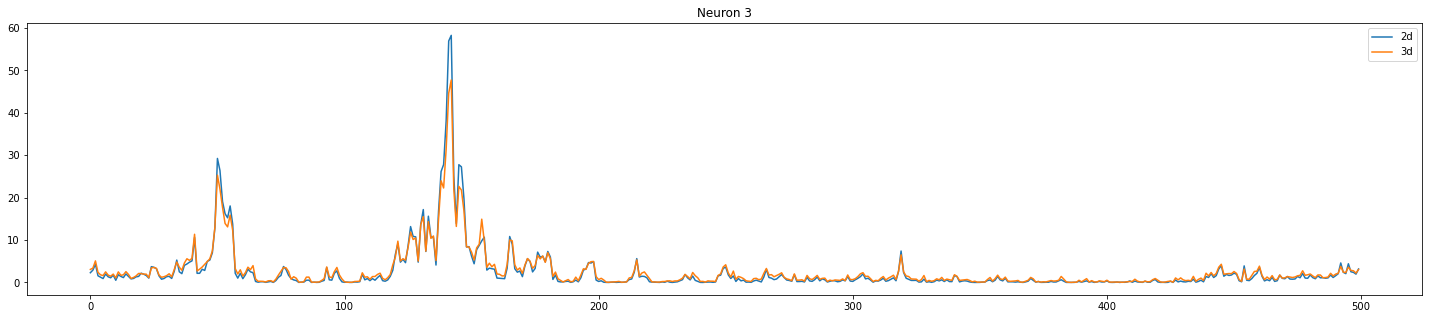

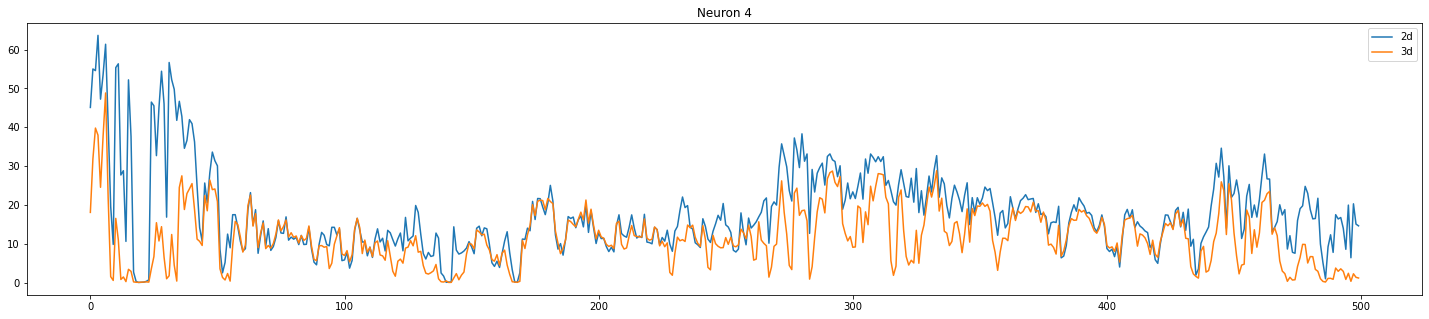

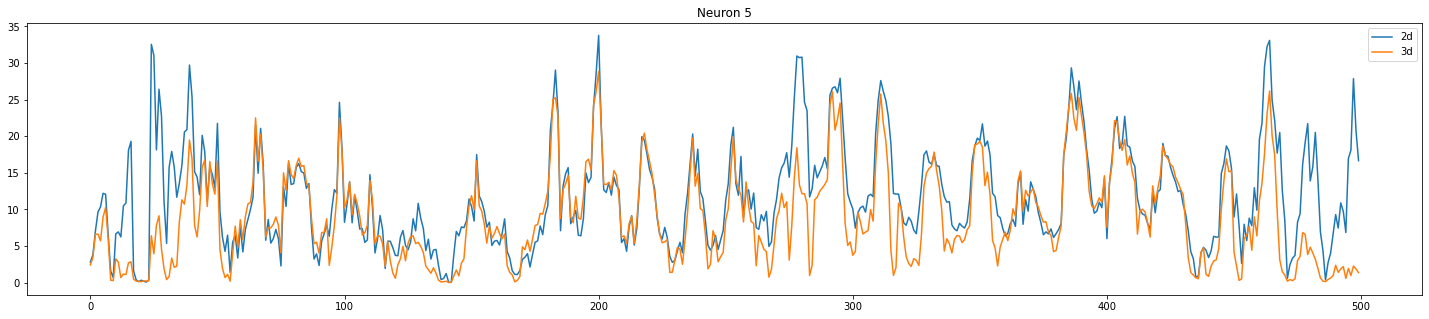

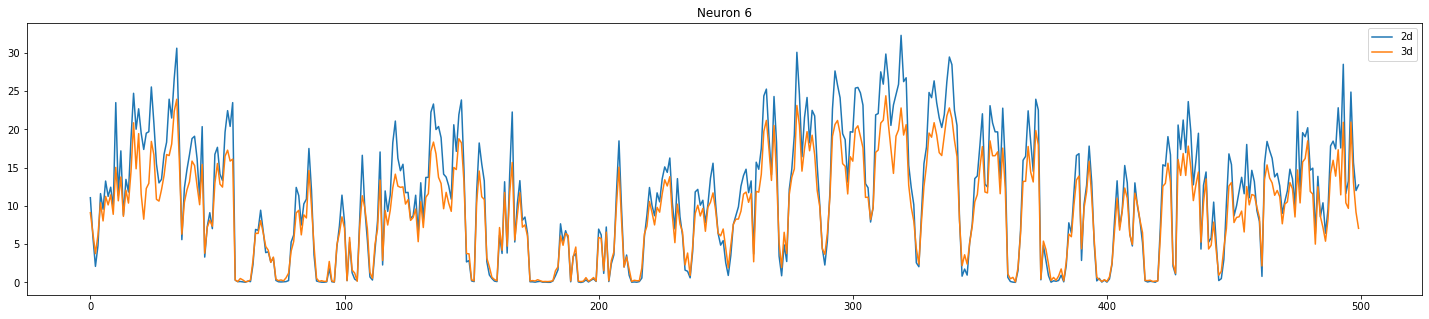

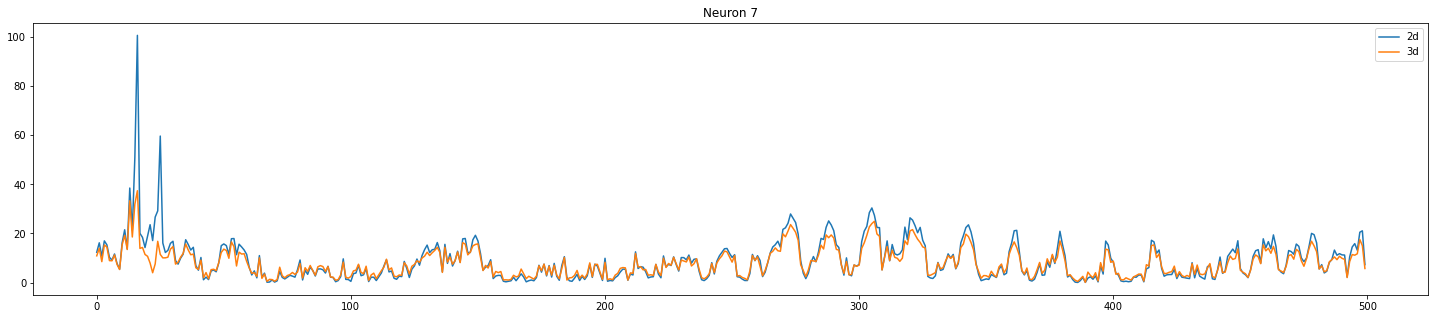

In [25]:
f('gcamp')

## Remove noise via ICA

In [22]:
which_neuron = 5

In [23]:
def my_clean(dat):
    dat = whiten(dat)
    dat = sig.medfilt(dat, kernel_size=3)
    return dat

In [24]:
dat_mcherry = my_clean(all_traces_3d[which_neuron]['mcherry'])
dat_gcamp = my_clean(all_traces_3d[which_neuron]['gcamp'])

In [25]:
# Data shaping
X = np.vstack((dat_mcherry, dat_gcamp)).transpose()
transformer = FastICA(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)

# Get which one is the signal vs. noise
A = transformer.mixing_
# noise_ind = np.argmax(np.abs(A[0,:]))
signal_ind = np.argmax(np.abs(A[1,:]))
noise_ind = 1 if signal_ind==0 else 0

Text(0.5, 1.0, 'ICA other mode')

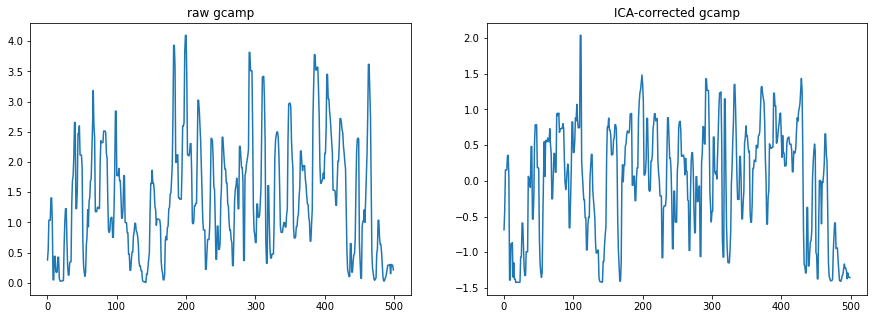

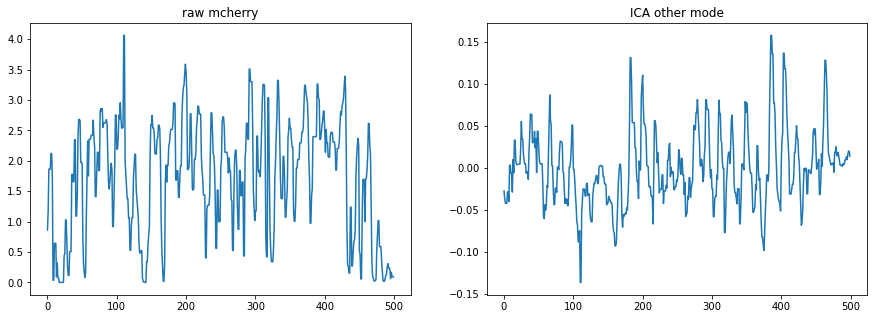

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_gcamp)
plt.title('raw gcamp')

plt.subplot(122)
plt.plot(X_transformed[:,signal_ind] * A[1,signal_ind])
plt.title('ICA-corrected gcamp')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_mcherry)
plt.title('raw mcherry')

plt.subplot(122)
plt.plot(-X_transformed[:,noise_ind])
plt.title('ICA other mode')

Text(0.5, 1.0, 'ICA other mode')

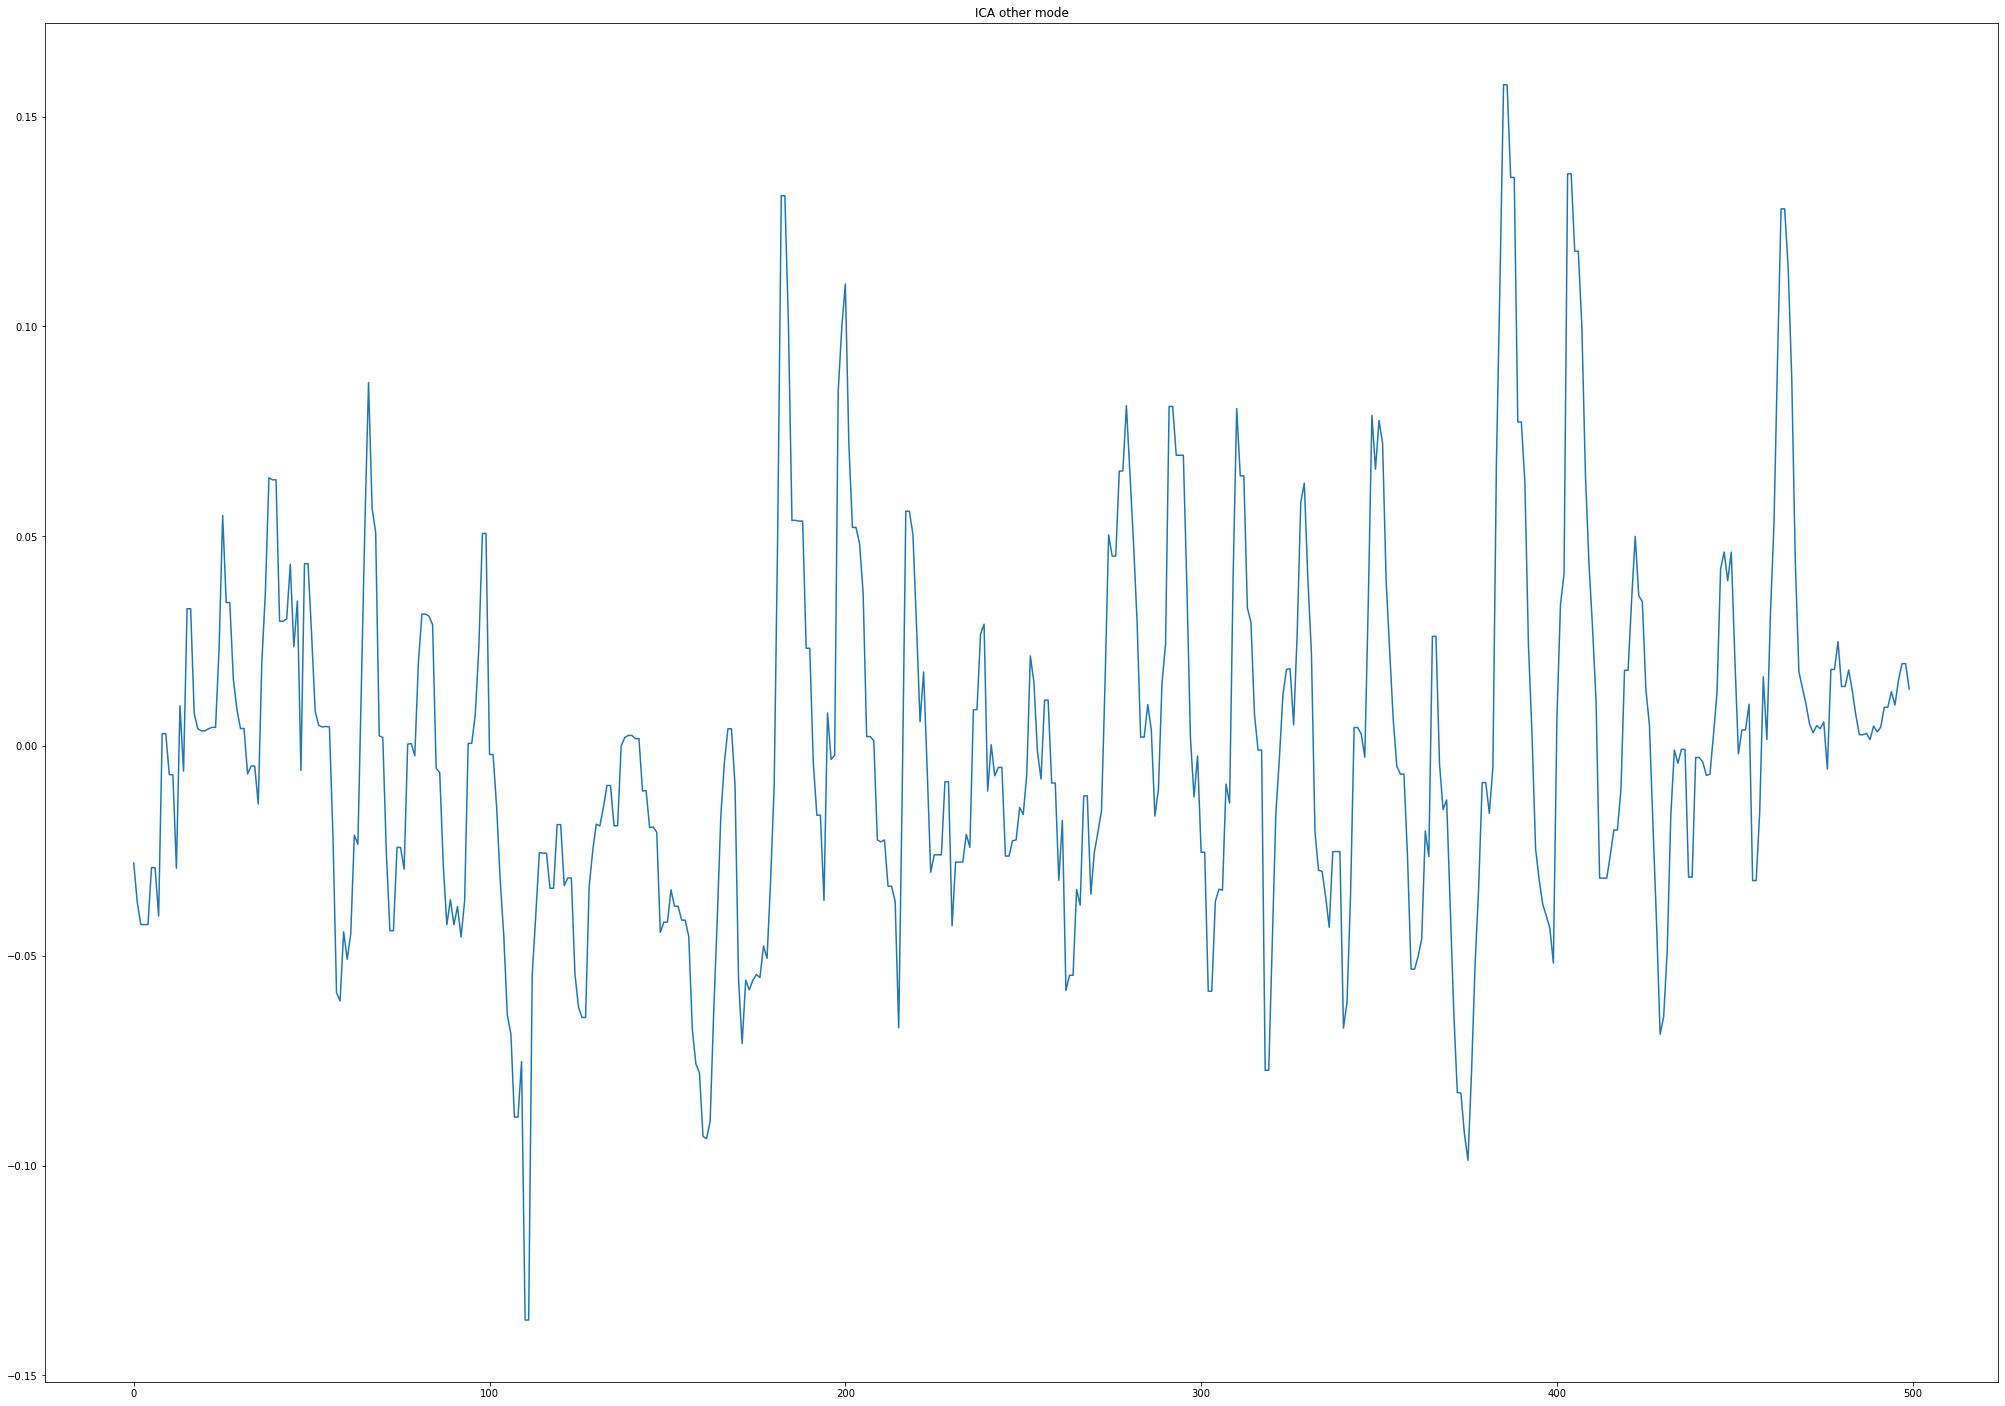

In [28]:
plt.figure(figsize=(35,25))

plt.plot(-X_transformed[:,noise_ind])
plt.title('ICA other mode')

In [64]:
A

array([[-21.30922776,  -0.83466444],
       [-17.61069896, -12.16605761]])

## Ratiometric

Text(0.5, 1.0, 'raw mcherry')

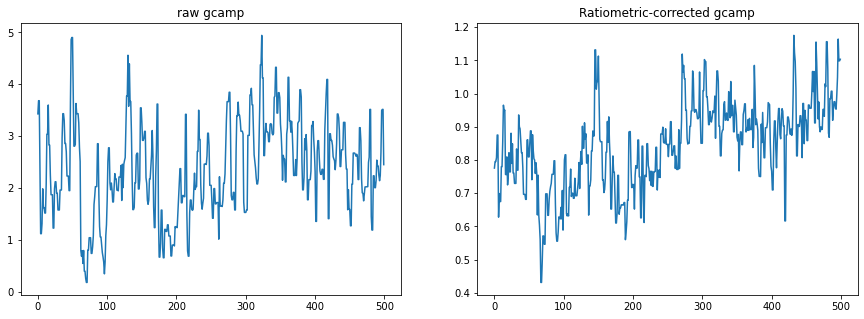

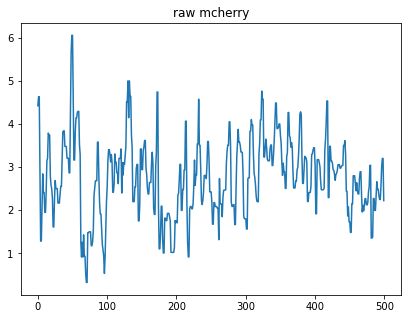

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_gcamp)
plt.title('raw gcamp')

plt.subplot(122)
plt.plot(dat_gcamp/dat_mcherry)
plt.title('Ratiometric-corrected gcamp')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_mcherry)
plt.title('raw mcherry')

# plt.subplot(122)
# plt.plot(-X_transformed[:,1])
# plt.title('ICA noise mode')

## ICA with multiple neuron-based noise

In [68]:
which_neurons = [1,2,3]

In [69]:
def my_clean(dat):
    dat = whiten(dat)
#     dat = sig.medfilt(dat, kernel_size=3)
    return dat

In [72]:
dat_mcherry = my_clean(np.vstack([all_traces[i]['mcherry'] for i in which_neurons]))
dat_gcamp = my_clean(np.vstack([all_traces[i]['gcamp'] for i in which_neurons]))

In [103]:
# Data shaping
X = np.vstack((dat_mcherry, dat_gcamp)).transpose()
transformer = FastICA(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)

# Get which one is the signal vs. noise
A = transformer.mixing_

In [104]:
A

array([[-38.68533067,  -8.07521307],
       [-38.65261969,  -4.58482189],
       [-38.39893662,  -7.89222976],
       [ -4.49144425, -26.98284903],
       [  2.69024274, -24.65131696],
       [  0.48838517, -29.11762831]])

In [97]:

signal_ind = np.argmax(np.abs(A[-1,:]))
noise_ind = 1 if signal_ind==0 else 0

Text(0.5, 1.0, 'ICA other mode')

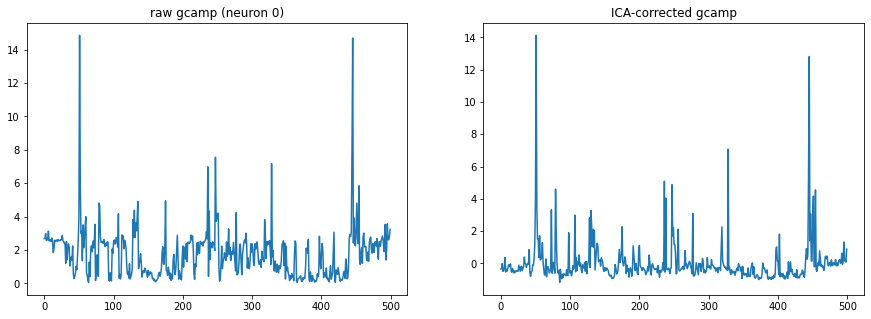

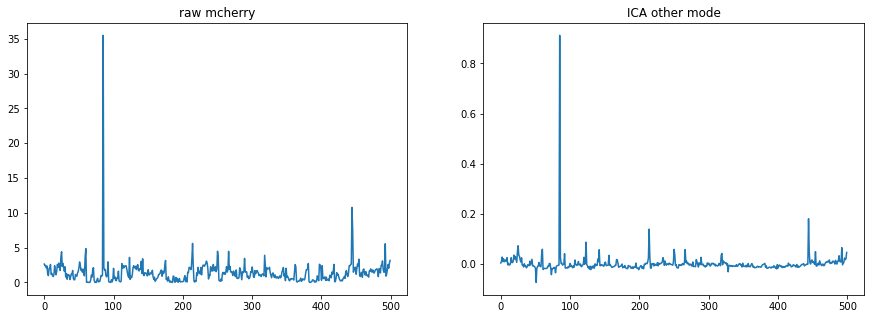

In [98]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_gcamp[0,:])
plt.title('raw gcamp (neuron 0)')

plt.subplot(122)
plt.plot(X_transformed[:,signal_ind] * A[-1,signal_ind])
plt.title('ICA-corrected gcamp')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_mcherry[0,:])
plt.title('raw mcherry')

plt.subplot(122)
plt.plot(-X_transformed[:,noise_ind])
plt.title('ICA other mode')

In [95]:
signal_ind

1

In [90]:
X_transformed.shape

(500, 2)

## Traces with video context

In [37]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

from DLC_for_WBFM.utils.visualization.plot_context_utils import *
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Get the video folder, then the annotation
project_folder = r'C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\DLC_Projects\wbfm_3d-Charlie-2020-11-02'
bigtiff_folder = r'D:\More-stabilized-wbfm'

annotation_fname = r'videos\test2020-10-22_mcherry_fr1000_sl10_15DLC_resnet50_wbfm_3dNov2shuffle1_200000.h5'
annotation_fname = os.path.join(project_folder, annotation_fname)

vid_fname = r'videos\test2020-10-22_mcherry_fr1000_sl10_15DLC_resnet50_wbfm_3dNov2shuffle1_200000_labeled.mp4'
vid_fname = os.path.join(project_folder, vid_fname)

# Will get traces from two videos:
btf_fname_mcherry = r'test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_mcherry = os.path.join(bigtiff_folder, btf_fname_mcherry)
btf_fname_gcamp = r'test2020-10-22_16-15-20_test4-channel-1-pco_camera2\test2020-10-22_16-15-20_test4-channel-1-pco_camera2bigtiff.btf'
btf_fname_gcamp = os.path.join(bigtiff_folder, btf_fname_gcamp)

In [44]:
vid_fname = vid_fname
gcamp_fname = btf_fname_gcamp
mcherry_fname = btf_fname_mcherry
annotation_fname = annotation_fname
trace_fname = 'all_traces_3d_7slices.pickle'#os.path.abspath('.\\all_traces_3d.pickle')

num_frames = 1000
crop_sz = (19,19,7)
start_volume=100
which_z=12

which_neuron = 0

In [45]:
%matplotlib inline

In [46]:
x = plot_video_crop_trace(vid_fname,
                          mcherry_fname,
                          gcamp_fname,
                          annotation_fname,
                          trace_fname,
                          which_neuron,
                          num_frames,
                          crop_sz,
                          alpha=0.15,
                          which_z=which_z,
                          start_volume=100,
                          flip_x=False)

interactive(children=(IntSlider(value=499, description='t', max=999), IntSlider(value=3, description='z', max=…